**LOADING THE DATA**

In [1]:
import pandas as pd
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
test.head()

,ID,Age,Workclass,Education,Marital.Status,Occupation,Relationship,Race,Sex,Hours.Per.Week,Native.Country
0,32562,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States
1,32563,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States
2,32564,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States
3,32565,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States
4,32566,18,NaN,Some-college,Never-married,NaN,Own-child,White,Female,30,United-States


**UNIVARIATE ANALYSIS**

In [2]:
train.dtypes

ID                 int64
Age                int64
Workclass         object
Education         object
Marital.Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Hours.Per.Week     int64
Native.Country    object
Income.Group      object
dtype: object

**1. CONTINUOUS VARIABLES**

In [3]:
train.describe()

,ID,Age,Hours.Per.Week
count,32561.000000,32561.000000,32561.000000
mean,16281.000000,38.581647,40.437456
std,9399.695394,13.640433,12.347429
min,1.000000,17.000000,1.000000
25%,8141.000000,28.000000,40.000000
50%,16281.000000,37.000000,40.000000
75%,24421.000000,48.000000,45.000000
max,32561.000000,90.000000,99.000000


**2. CATEGORICAL VARIABLES:**

In [5]:
categorical_variable=train.dtypes.loc[train.dtypes=='object'].index
print(categorical_variable)

Index(['Workclass', 'Education', 'Marital.Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native.Country', 'Income.Group'],
      dtype='object')


In [6]:
train[categorical_variable].apply(lambda x: len(x.unique()))

Workclass          9
Education         16
Marital.Status     7
Occupation        15
Relationship       6
Race               5
Sex                2
Native.Country    42
Income.Group       2
dtype: int64

**2.1 Analyzing Race**

In [7]:
#print count of each category
train["Race"].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: Race, dtype: int64

In [8]:
#print percentage value 
train["Race"].value_counts()/train.shape[0] #shape[0] means no of rows

White                 0.854274
Black                 0.095943
Asian-Pac-Islander    0.031909
Amer-Indian-Eskimo    0.009551
Other                 0.008323
Name: Race, dtype: float64

**2.2 Analyzing Native-Country**

In [9]:
#print count of each category
train["Native.Country"].value_counts()

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France                      

In [10]:
#print percentage value 
train["Native.Country"].value_counts()/train.shape[0] #shape[0] means no of rows

United-States                 0.895857
Mexico                        0.019748
Philippines                   0.006081
Germany                       0.004207
Canada                        0.003716
Puerto-Rico                   0.003501
El-Salvador                   0.003255
India                         0.003071
Cuba                          0.002918
England                       0.002764
Jamaica                       0.002488
South                         0.002457
China                         0.002303
Italy                         0.002242
Dominican-Republic            0.002150
Vietnam                       0.002058
Guatemala                     0.001966
Japan                         0.001904
Poland                        0.001843
Columbia                      0.001812
Taiwan                        0.001566
Haiti                         0.001351
Iran                          0.001321
Portugal                      0.001136
Nicaragua                     0.001044
Peru                     

**1. Both Categorical**

In [11]:
ct=pd.crosstab(train["Sex"],train["Income.Group"],margins=True)
print(ct)

Income.Group  <=50K  >50K    All
Sex                             
Female         9592  1179  10771
Male          15128  6662  21790
All           24720  7841  32561


**Importing Matplot library**

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

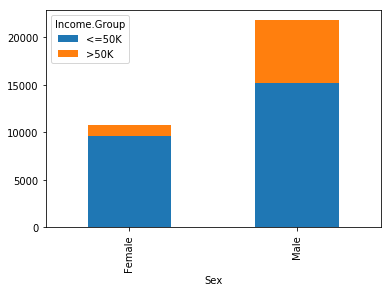

In [13]:
ct.iloc[:-1,:-1].plot(kind='bar',stacked=True)
plt.show()

**Creating graph for percentage numbers using function**

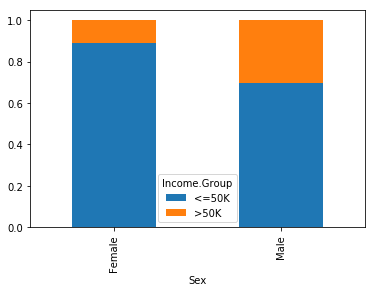

In [14]:
def percConvert(ser):
  return ser/float(ser[-1])

ct2=ct.apply(percConvert,axis=1)
ct2.iloc[:-1,:-1].plot(kind='bar',stacked=True)

**2. BOTH CONTINUOUS**

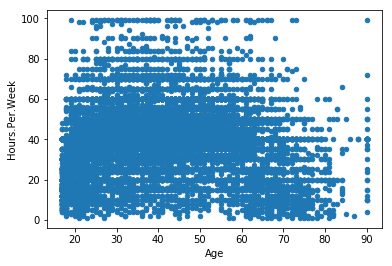

In [15]:
train.plot('Age','Hours.Per.Week',kind='scatter')

*There is no relationship with those two variables*

**3. CATEGORICAL-CONTINUOUS COMBINATION**

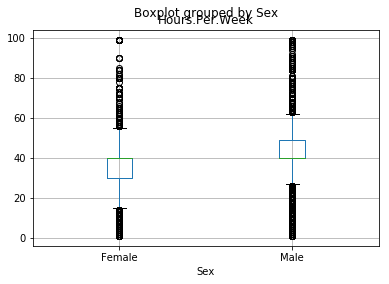

In [16]:
train.boxplot('Hours.Per.Week','Sex')

**1. Checking missing values**

In [17]:
train.isnull().sum()

ID                   0
Age                  0
Workclass         1836
Education            0
Marital.Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Hours.Per.Week       0
Native.Country     583
Income.Group         0
dtype: int64

In [18]:
test.isnull().sum()

ID                  0
Age                 0
Workclass         963
Education           0
Marital.Status      0
Occupation        966
Relationship        0
Race                0
Sex                 0
Hours.Per.Week      0
Native.Country    274
dtype: int64

**2. Imputation**

*Since we want to impute with mode, we'll use the scipy library function mode to do the job.*

In [0]:
from scipy.stats import mode
import numpy as np

In [20]:
mode(train["Workclass"]).mode[0]

'Private'

In [0]:
var_to_impute=['Workclass','Occupation','Native.Country']
for imp in var_to_impute:
  train[imp].fillna(mode(train[imp]).mode[0],inplace=True)
  test[imp].fillna(mode(test[imp]).mode[0],inplace=True)

In [22]:
train.isnull().sum()

ID                0
Age               0
Workclass         0
Education         0
Marital.Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Hours.Per.Week    0
Native.Country    0
Income.Group      0
dtype: int64

In [23]:
test.isnull().sum()

ID                0
Age               0
Workclass         0
Education         0
Marital.Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Hours.Per.Week    0
Native.Country    0
dtype: int64

**Outlier Treatment**

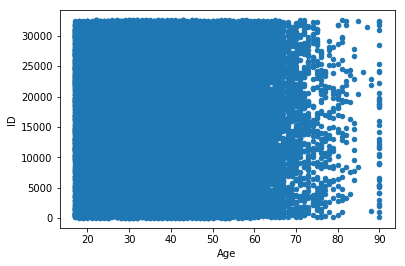

In [24]:
train.plot('Age','ID',kind='scatter')

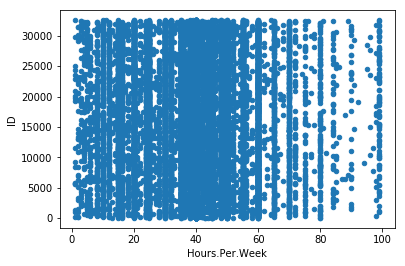

In [25]:
train.plot('Hours.Per.Week','ID',kind='scatter')

**Variable Transformation**

In [26]:
train["Workclass"].value_counts()/train.shape[0]

Private             0.753417
Self-emp-not-inc    0.078038
Local-gov           0.064279
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Without-pay         0.000430
Never-worked        0.000215
Name: Workclass, dtype: float64

*Categories to combine*

In [0]:
cat_to_comb=['State-gov','Self-emp-inc','Federal-gov','Without-pay','Never-worked']
#Run loop and replace the value to other
for cat in cat_to_comb:
  train["Workclass"].replace({cat:'others'},inplace=True)
  test["Workclass"].replace({cat:'others'},inplace=True)

**STEP1: MAKE A LIST OF VARIABLES TO COMBINE**

In [35]:
categorical_variables=list(train.dtypes.loc[train.dtypes=='object'].index)
print(categorical_variables)

['Workclass', 'Education', 'Marital.Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native.Country', 'Income.Group']


In [0]:
#Remove Workplace already combined
categorical_variables=categorical_variables[1:]

In [37]:
train[categorical_variables].apply(lambda x: len(x.unique()))

Education         16
Marital.Status     7
Occupation        14
Relationship       6
Race               5
Sex                2
Native.Country    41
Income.Group       2
dtype: int64

**STEP2: RUN A LOOP OVER THESE VALUES AND COMBINE CATEGORIES**

In [0]:
for col in categorical_variables:
  frq=train[col].value_counts()/train.shape[0]
  cat_to_cmb=frq.loc[frq.values<0.05].index
  
  for cat in cat_to_cmb:
    train[col].replace({cat:'others'},inplace=True)
    test[col].replace({cat:'others'},inplace=True)

In [40]:
train[categorical_variables].apply(lambda x: len(x.unique()))


Education         5
Marital.Status    4
Occupation        8
Relationship      5
Race              3
Sex               2
Native.Country    2
Income.Group      2
dtype: int64

In [41]:
#test[categorical_variables].apply(lambda x: len(x.unique()))
print(categorical_variables)

['Education', 'Marital.Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native.Country', 'Income.Group']


In [52]:
categorical_variables_test=categorical_variables_test[:-1]
print(categorical_variables_test)
test[categorical_variables_test].apply(lambda x: len(x.unique()))

['Education', 'Marital.Status', 'Occupation', 'Relationship', 'Race', 'Sex']


Education         5
Marital.Status    4
Occupation        8
Relationship      5
Race              3
Sex               2
dtype: int64

**Predictive Modeling**

*Step1: Data Preprocessing*

In [0]:
from sklearn.preprocessing import LabelEncoder

In [54]:
categorical_variables=train.dtypes.loc[train.dtypes=="object"].index
print(categorical_variables)

Index([], dtype='object')


sklearn accepts only numeric data so we've to convert text to numbers

In [55]:
#Now we convert them using LabelEncoder
le=LabelEncoder()
for var in categorical_variables:
  train[var]=le.fit_transform(train[var])
  test[var]=le.fit_transform(test[var])
  
test.head(10)

,ID,Age,Workclass,Education,Marital.Status,Occupation,Relationship,Race,Sex,Hours.Per.Week,Native.Country
0,32562,25,1,4,2,3,2,0,1,40,0
1,32563,38,1,1,1,7,0,1,1,50,0
2,32564,28,0,4,1,7,0,1,1,40,0
3,32565,44,1,3,1,3,0,0,1,40,0
4,32566,18,1,3,2,5,2,1,0,30,0
5,32567,34,1,4,2,4,1,1,1,30,0
6,32568,29,1,1,2,5,3,0,1,40,0
7,32569,63,2,4,1,5,0,1,1,32,0
8,32570,24,1,3,2,4,3,1,0,40,0
9,32571,55,1,4,1,1,0,1,1,10,0


In [66]:
train.dtypes

ID                int64
Age               int64
Workclass         int64
Education         int64
Marital_Status    int64
Occupation        int64
Relationship      int64
Race              int64
Sex               int64
Hours_Per_Week    int64
Native_Country    int64
Income.Group      int64
dtype: object

In [68]:
train.rename(columns={'Marital.Status':'Marital_Status',
                          'Hours.Per.Week':'Hours_Per_Week',
                          'Native.Country':'Native_Country',
                     'Income.Group':'Income_Group'},inplace=True)
train.head()

,ID,Age,Workclass,Education,Marital_Status,Occupation,Relationship,Race,Sex,Hours_Per_Week,Native_Country,Income_Group
0,1,39,3,0,2,0,1,1,1,40,0,0
1,2,50,2,0,1,2,0,1,1,13,0,0
2,3,38,1,1,0,7,1,1,1,40,0,0
3,4,53,1,4,1,7,0,0,1,40,0,0
4,5,28,1,0,1,5,4,0,0,40,1,0


*Step2: Fit the model*

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
#define predictor variable which is Input avoid Id and output/target
dependent_variable='Income_Group'  #output feature
independent_variable=[x for x in train.columns if x not in ['ID',dependent_variable]]

print(independent_variable)

['Age', 'Workclass', 'Education', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Hours_Per_Week', 'Native_Country']


**RUN the model**

In [72]:
#Initialize the algorithms
model=DecisionTreeClassifier(max_depth=10,min_samples_leaf=100,max_features='sqrt')

#Fit the algorithm

model.fit(train[independent_variable],train[dependent_variable])



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

**Make predictions**

In [0]:
predictions_train=model.predict(train[independent_variable])


In [78]:
test.rename(columns={'Marital.Status':'Marital_Status',
                          'Hours.Per.Week':'Hours_Per_Week',
                          'Native.Country':'Native_Country'},inplace=True)
test.head()


,ID,Age,Workclass,Education,Marital_Status,Occupation,Relationship,Race,Sex,Hours_Per_Week,Native_Country
0,32562,25,1,4,2,3,2,0,1,40,0
1,32563,38,1,1,1,7,0,1,1,50,0
2,32564,28,0,4,1,7,0,1,1,40,0
3,32565,44,1,3,1,3,0,0,1,40,0
4,32566,18,1,3,2,5,2,1,0,30,0


In [0]:
predictions_test=model.predict(test[independent_variable])

**Analyze results:**

In [0]:
from sklearn.metrics import accuracy_score

In [82]:
#Determine the train error
acc_train=accuracy_score(train[dependent_variable],predictions_train)
print('train accuracy:%f'%acc_train)

train accuracy:0.815945
